In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-pjme-hourly/10.PJME_hourly.csv


# libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
plt.style.use('fivethirtyeight')
color_pal=sns.color_palette()

# reading data 

In [3]:
df=pd.read_csv(r"/kaggle/input/10-pjme-hourly/10.PJME_hourly.csv")
df=df.set_index('Datetime')

In [4]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2+ MB


In [6]:
df.index=pd.to_datetime(df.index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [8]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [9]:
df.isnull().sum()

PJME_MW    0
dtype: int64

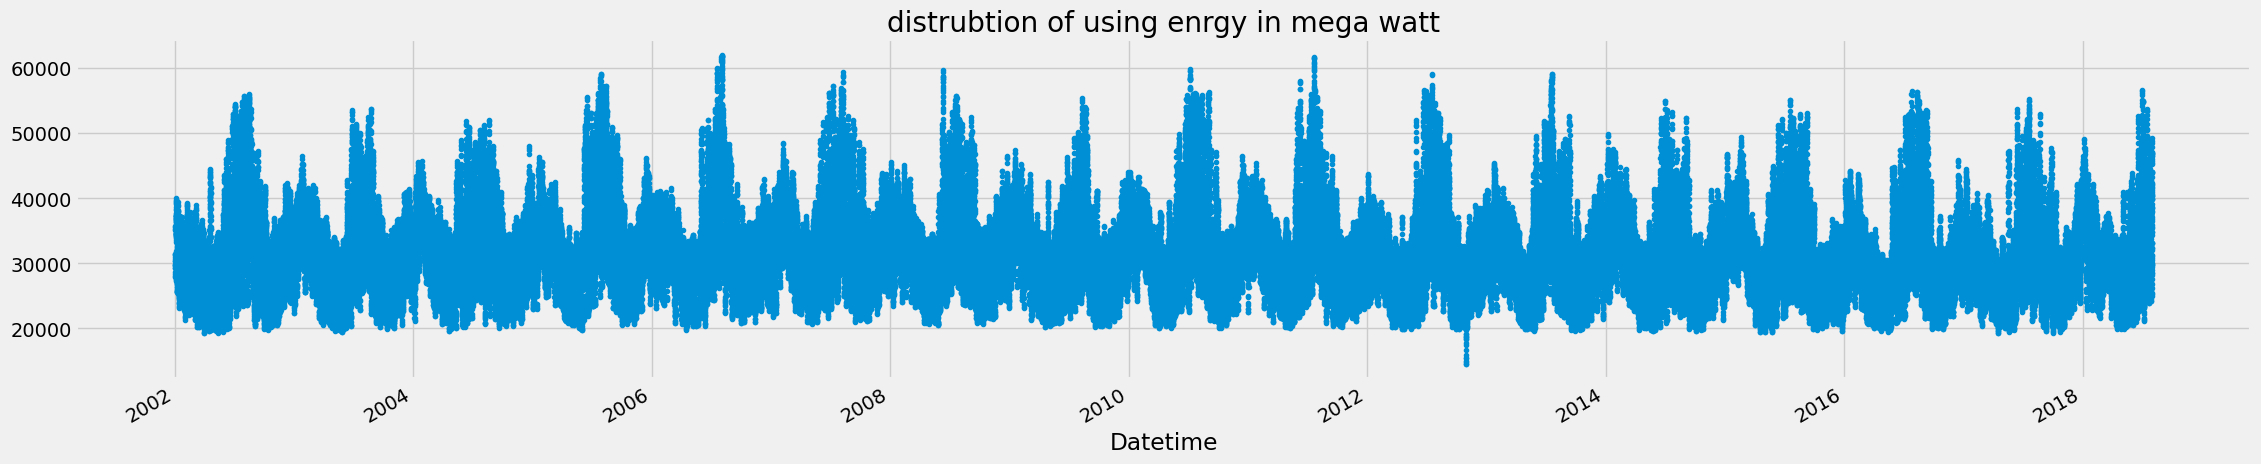

In [10]:
df['PJME_MW'].plot(figsize=(25,5),style=".",title="distrubtion of using enrgy in mega watt")
plt.show()

In [11]:
df['hour']=df.index.hour

In [12]:
df.head()

,PJME_MW,hour
Datetime,,
2002-12-31 01:00:00,26498.0,1
2002-12-31 02:00:00,25147.0,2
2002-12-31 03:00:00,24574.0,3
2002-12-31 04:00:00,24393.0,4
2002-12-31 05:00:00,24860.0,5


# feature creating

In [13]:
df['dayofweek']=df.index.dayofweek
df['month']=df.index.month
df['quarter']=df.index.quarter
df['year']=df.index.year
df['dayofyear']=df.index.dayofyear

In [14]:
df.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365


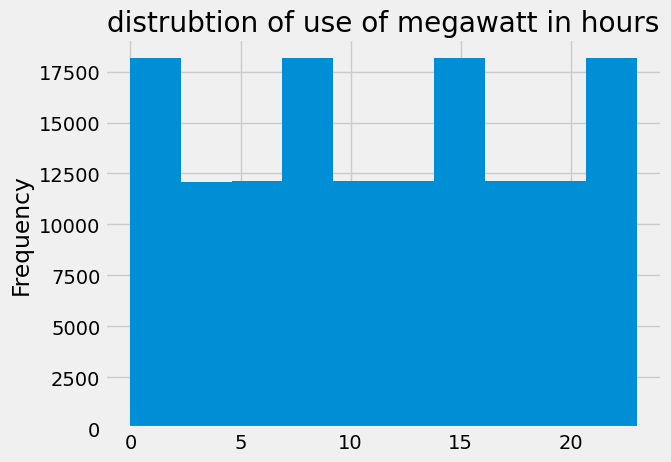

In [15]:
df['hour'].plot(kind="hist")
plt.title("distrubtion of use of megawatt in hours");

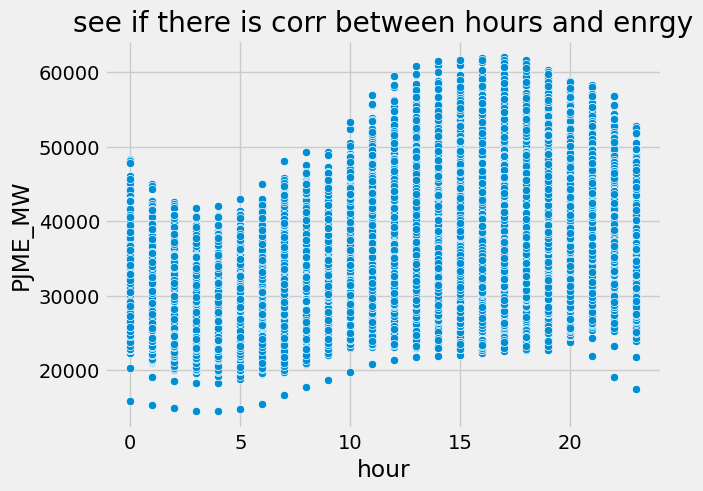

In [16]:
sns.scatterplot(data=df,x='hour',y='PJME_MW')
plt.title("see if there is corr between hours and enrgy")
plt.show()

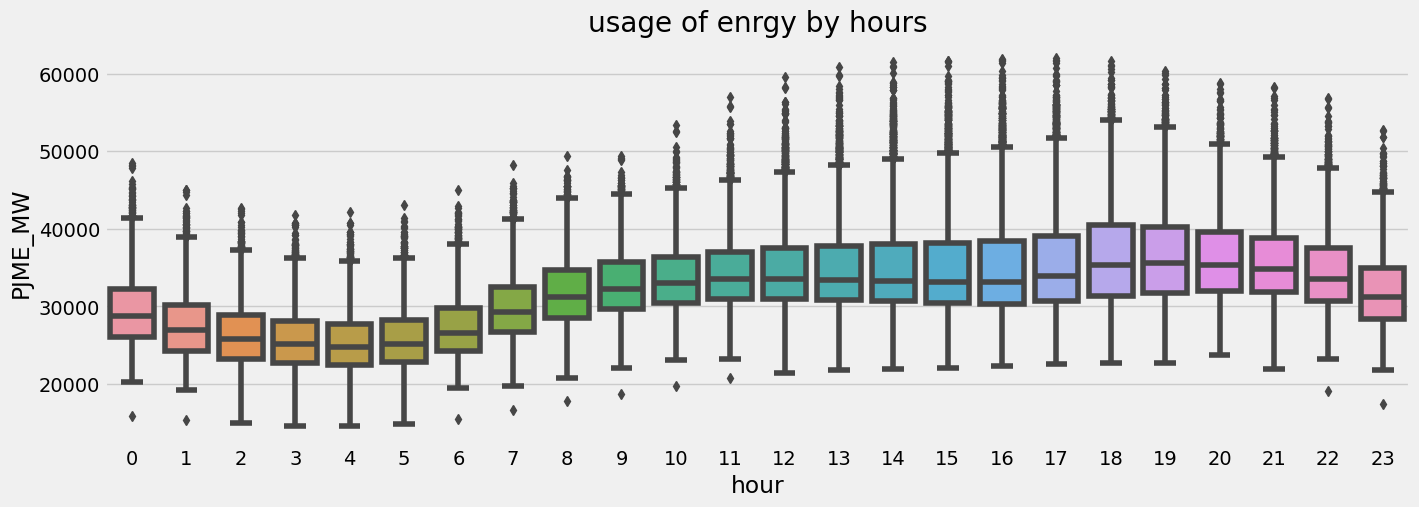

In [17]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='hour',y=df['PJME_MW'])
plt.title("usage of enrgy by hours");

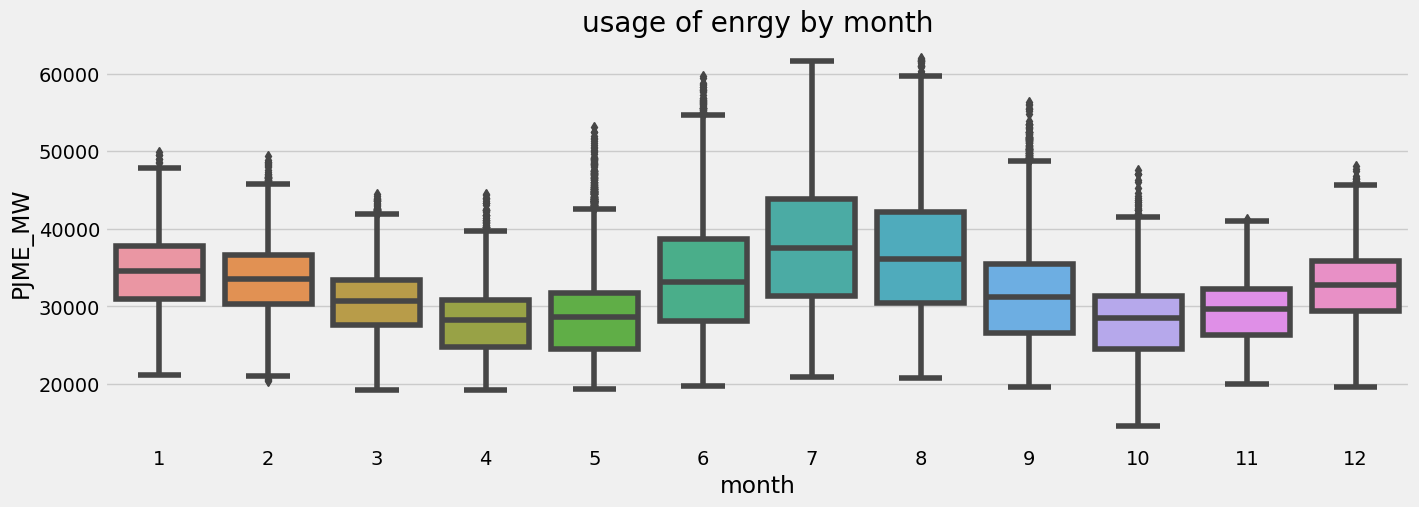

In [18]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='month',y=df['PJME_MW'])
plt.title("usage of enrgy by month");

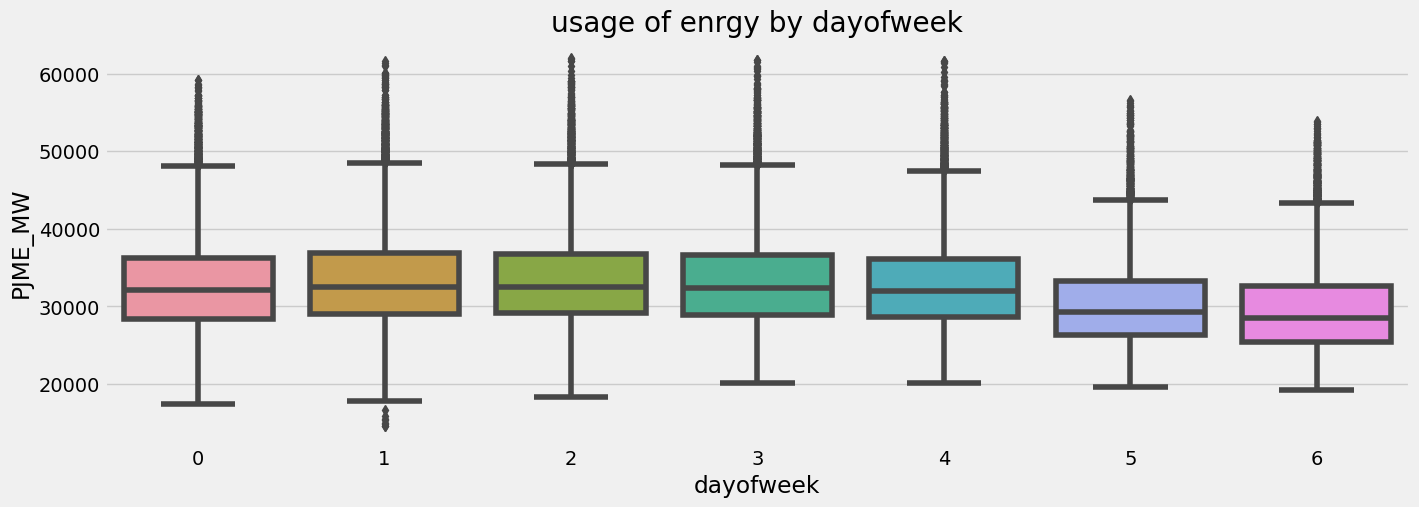

In [19]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='dayofweek',y=df['PJME_MW'])
plt.title("usage of enrgy by dayofweek");

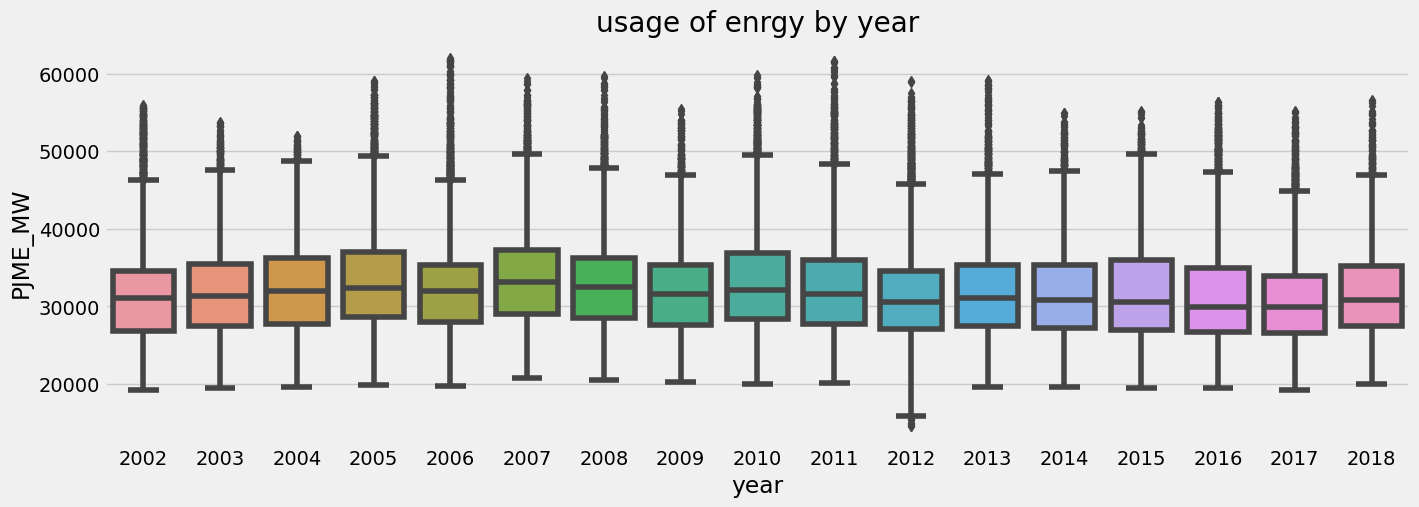

In [20]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='year',y=df['PJME_MW'])
plt.title("usage of enrgy by year");

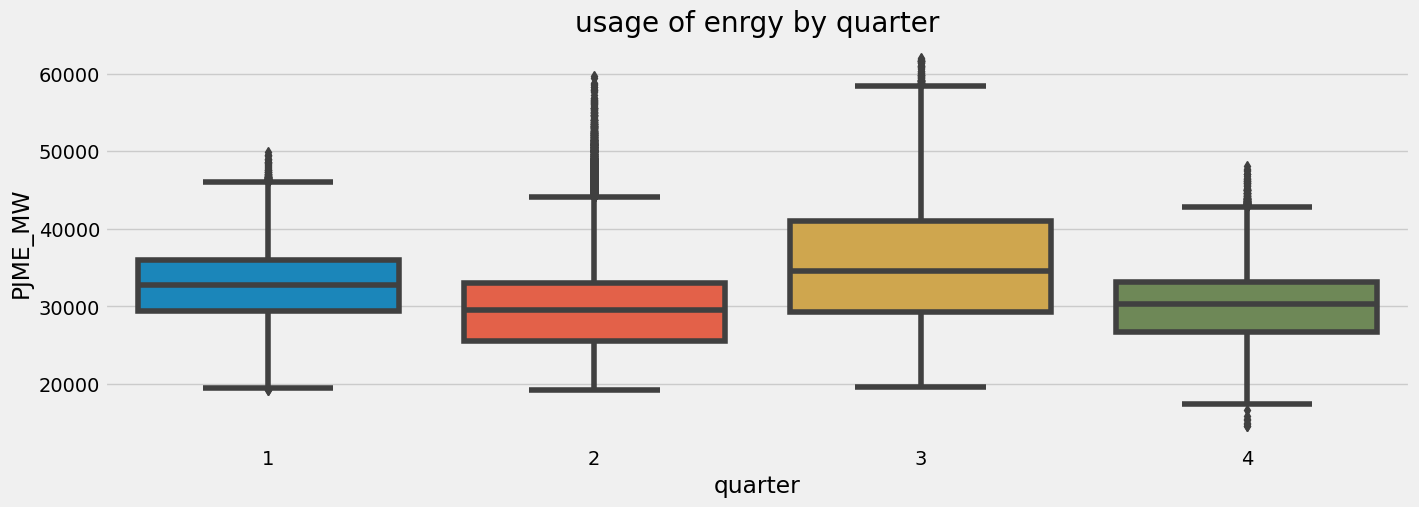

In [21]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=df,x='quarter',y=df['PJME_MW'])
plt.title("usage of enrgy by quarter");

# split our data for train and test

In [22]:
train_set=df.loc[df.index<'01-01-2015']
test_set=df.loc[df.index>='01-01-2015']

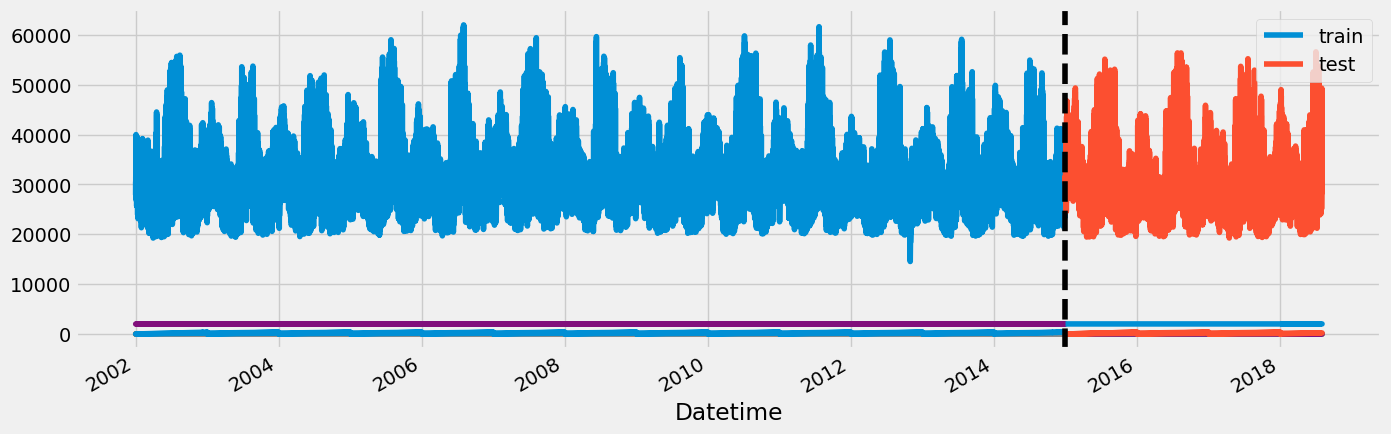

In [23]:
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax,label="train")
test_set.plot(ax=ax,label="test")
plt.legend(['train','test'])
ax.axvline('01-01-2015',ls="--",color="Black"); # to put vertical line seprate between train and test data 

our test data with orange color and blue for train data 
always rember that train data must be in past and future data in our test data 

# splitting the data to 
xtrain ,
ytrain ,
xtest ,
ytest

In [24]:
X_train=train_set.drop('PJME_MW',axis=1)
y_train=train_set['PJME_MW']
X_test=test_set.drop('PJME_MW',axis=1)
y_test=test_set['PJME_MW']

In [25]:
y_test.index

DatetimeIndex(['2015-01-01 00:00:00', '2015-12-31 01:00:00',
               '2015-12-31 02:00:00', '2015-12-31 03:00:00',
               '2015-12-31 04:00:00', '2015-12-31 05:00:00',
               '2015-12-31 06:00:00', '2015-12-31 07:00:00',
               '2015-12-31 08:00:00', '2015-12-31 09:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=31440, freq=None)

In [26]:
model=XGBRegressor(n_estimator=1000,early_stopping_round=50)

In [27]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [21:40:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [28]:
predict=model.predict(X_test)
predict=pd.Series(predict)

In [29]:
predict.index=y_test.index

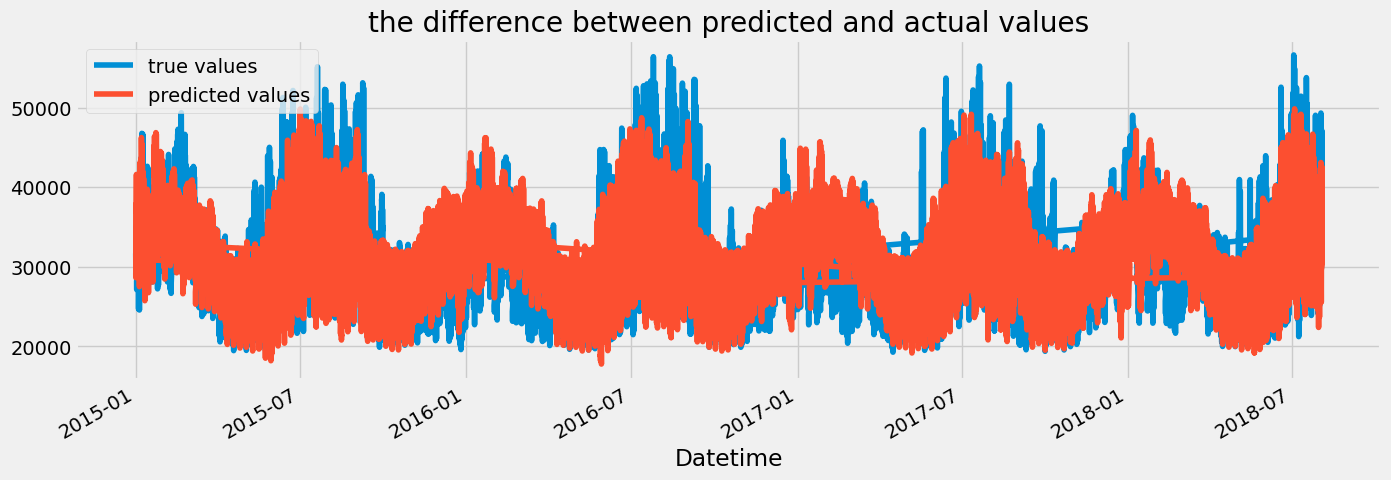

In [30]:
fig,ax=plt.subplots(figsize=(15,5))
y_test.plot(ax=ax)
predict.plot(ax=ax)
plt.legend(['true values','predicted values'])
plt.title("the difference between predicted and actual values")
plt.show()